# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to either make a video or submit a writeup explaining the main part of the code. For video, upload it to youtube or any other video sharing service and provide the link in the form given below. For Text writeup, you can create a blog or write it in a doc file and submit.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
2. Video/Writeup for Feature 1: 15 marks
3. Feature 2: 35 marks
4. Video/Writeup for Feature 2: 15 marks

In [34]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [35]:
import sys
sys.path.append('../resource/lib/public')
import faceBlendCommon as fbc

In [36]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [37]:
from math import hypot
import os

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [38]:
# Landmark model location
PREDICTOR_PATH =  "../resource/lib/publicdata/models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [39]:
os.listdir("../resource/lib/publicdata/models/")

['coco.names',
 'openface.nn4.small2.v1.t7',
 'dlib_face_recognition_resnet_model_v1.dat',
 'shape_predictor_68_face_landmarks.dat',
 'ssd_mobilenet_v2_coco_2018_03_29.pbtxt',
 'coco_class_labels.txt',
 'yolov3.weights',
 'shape_predictor_5_face_landmarks.dat',
 'ssd_mobilenet_v2_coco_2018_03_29',
 'yolov3.cfg']

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

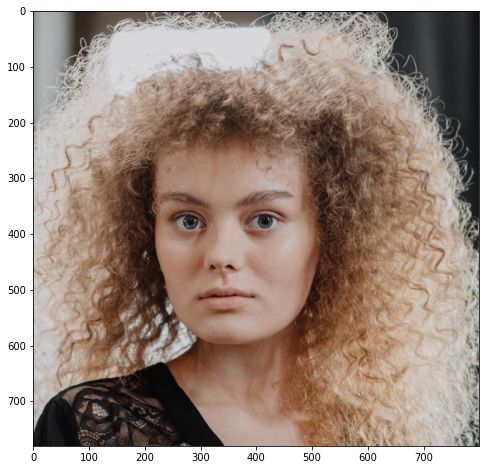

In [40]:
im = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [41]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

In [60]:
glassGirl = imDlib.copy()

Feature 1 : Adding Glasses to the image. 
**Approach**
    
    - Using facial landmark data identify the left most point of the eye and the right most point of the eye

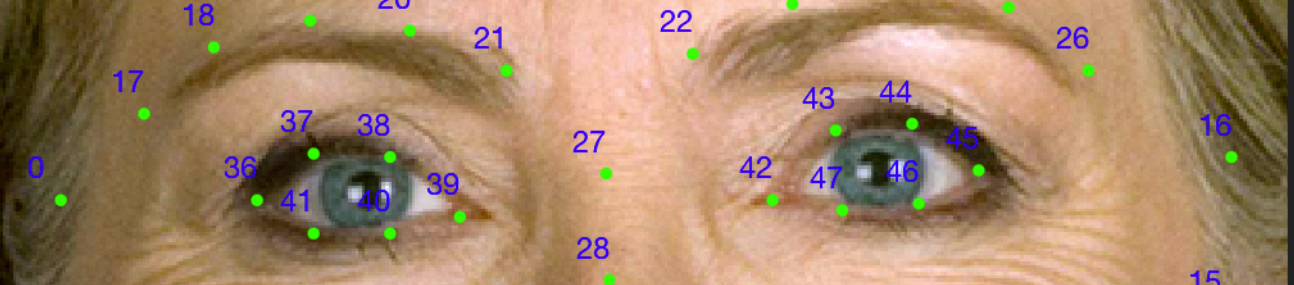

    - The points 0 and 16 are going to be used.
    - Point 27 is important during selecting the region of interest 
        - This is so we want to support the spectacles on the nose bridge
    - Select the spectacles
    - Split the color channels and Alpha channel seperately
    - Using bitwise operation and masking to position the spectacle on the face

## Calculating distance b/w ends of the eyes
   - This is done to resize the glass image properly

In [61]:
dist = hypot(points[16][0] - points[0][0],points[16][1] - points[0][1])
dist = round(dist)

In [62]:
!ls Data 

1.png  2.png  Glass1.png  SunGlass.png	TestSubject1.png  TestSubject2.png


In [63]:
filePath = os.path.join(os.getcwd(),"Data", "Glass1.png")
filePath

'/mnt/data2/students/ccc_v1_w_NWE2_114024/asn197481_12/asn197482_1/work/Data/Glass1.png'

## Reading the Glass Image 
The glass image will be required to be in png format for extracting the foreground image and the alpha mask.

In [64]:
glass = cv2.imread(filePath, -1)

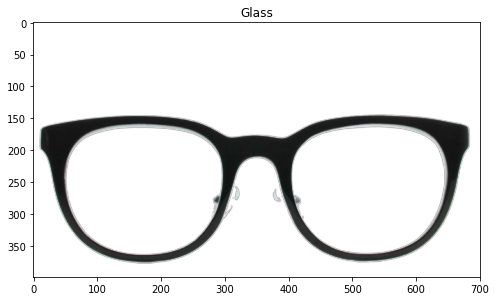

In [65]:
plt.imshow(glass)
plt.title("Glass")
plt.show()

## Resizing the glass Image
    - In order for the glass to fit on the face properly we need to resize 
    - This resizing will be done based on the distance calculated previously 
        - Distance will resize the glass dynamically to fit the face
    - Preserving the aspect ratio is important and the value of 0.5 is obtained through heuristics.
    - This process before splitting the color channels otherwise we will require to do sperately on the 
      color channels and the alpha mask

In [66]:
dw = dist
dh = int(dw * 0.50)
glassesResize = cv2.resize(glass,(dw,dh))

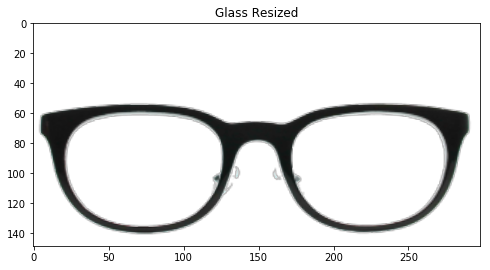

In [67]:
plt.imshow(glassesResize)
plt.title("Glass Resized")
plt.show()

## Splitting the Color Channels 

In [68]:
# glassesResize.shape
# glass.shape
b,g,r,a = cv2.split(glassesResize)

In [69]:
glassReshaped = cv2.merge((b,g,r))
glassAlpha = cv2.merge((a,a,a))

In [70]:
glassReshaped = cv2.cvtColor(glassReshaped, cv2.COLOR_BGR2RGB)

In [71]:
glassReshapedGray = glassReshaped.copy()

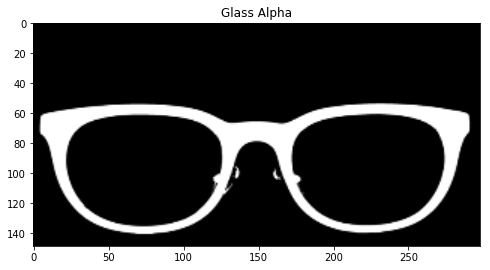

In [72]:
plt.imshow(glassAlpha)
plt.title("Glass Alpha")
plt.show()

## Using Naive Replace 
    - We will apply the reshaped color image of the spectacles onto the subject image

In [73]:
glassAlphaCopy = glassAlpha.copy()

In [74]:
glassAlphaFinal = glassAlphaCopy

## Creation of region of interest
    - To mark the area where the glases will be placed on the image
    - The glasses must have their centre on the nose bridge
        - For that we have taken the midpoint (points[27]) into consideration
          in calculating the ROI
    - We will calculate the ROI as a rectangle 

In [75]:
midpointX, midpointY = points[27]
print(midpointX, midpointY)

338 374


In [76]:
y1 = midpointY - int(dh * 0.4)
y2 = y1 + dh
x1 = midpointX - int(dw / 2)
x2 = midpointX + int(dw / 2)

In [77]:
print(y1,y2,x1,x2)

315 464 189 487


Text(0.5,1,"ROI Girl's Image")

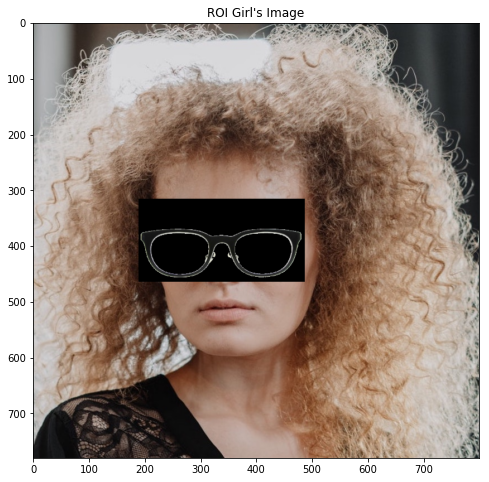

In [80]:
glassGirl[y1:y2,x1:x2]=glassReshaped
plt.imshow(glassGirl)
plt.title(r"ROI Girl's Image")

## Bitwise Operation
    - The bitwise operation for seamlessly combing the two images
    - bitwise_and to mark the specific area(ROI) required by the spectacles on the background(Girl Image) 
    - bitwise_or to add the spectacles on the image at the ROI created by the previous bitwise_and operation

In [81]:
glassesGirlROI = imDlib.copy()
glassesGirlROI = glassesGirlROI[y1:y2,x1:x2]
glassesGirlROIImage = cv2.bitwise_and(glassesGirlROI,cv2.bitwise_not(glassAlphaFinal))

## Image with ROI 

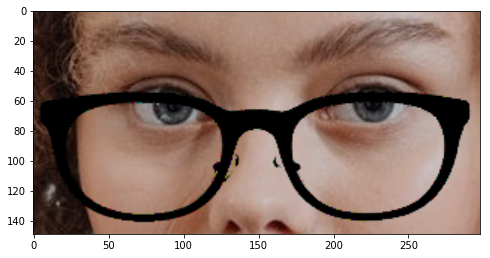

In [82]:
plt.imshow(glassesGirlROIImage)

## Image with glasses added to the face

In [87]:
glassesGirlROIFinal = cv2.bitwise_or(glassesGirlROIImage , glassReshaped)

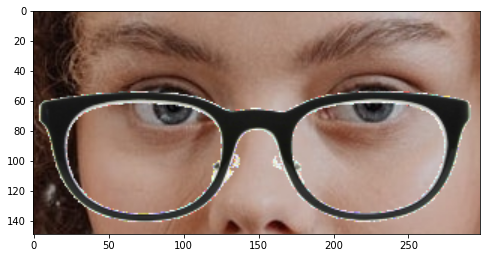

In [88]:
plt.imshow(glassesGirlROIFinal)
plt.show()

## Combining the ROI with glasses with the original image 

Text(0.5,1,'Image with Glasses')

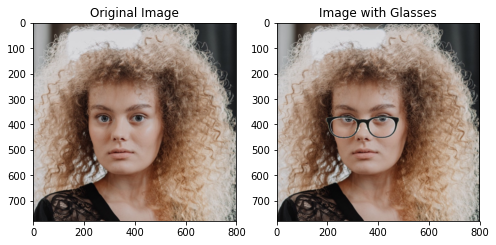

In [89]:
glassFinalGirl = imDlib.copy()
glassFinalGirl[y1:y2,x1:x2] = glassesGirlROIFinal
plt.subplot(121);plt.imshow(imDlib);plt.title("Original Image")
plt.subplot(122);plt.imshow(glassFinalGirl);plt.title("Image with Glasses")

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

Feature 1 : Adding Earrings to the image. 
**Approach**
    
    - Using facial landmark data identify the left most point of the eye and the right most point of the eye

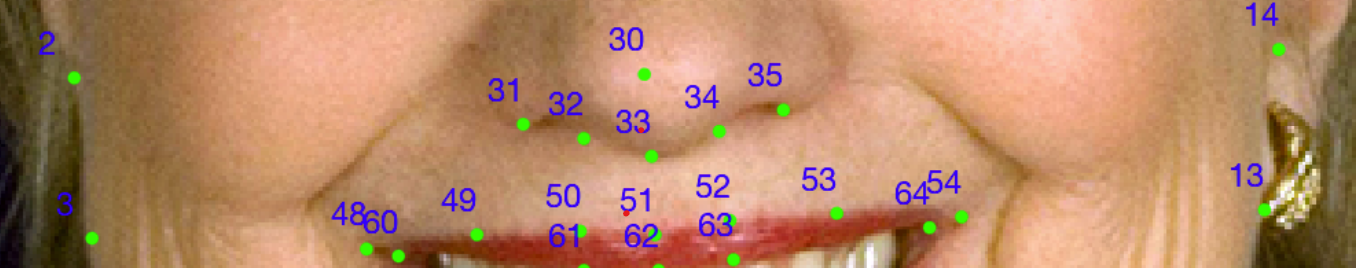

    - The points 3 and 15 are used based on the given image.
    - The choice of points is to allow a hinge for attaching the earrings.
    - A face rectangle is calculated that will be used to resize the earrings
    - This choice of rectangle will be of the face with the highest confidence.
        - If the image is too small then the earrings won't be shown this is why i have taken
          this approach 

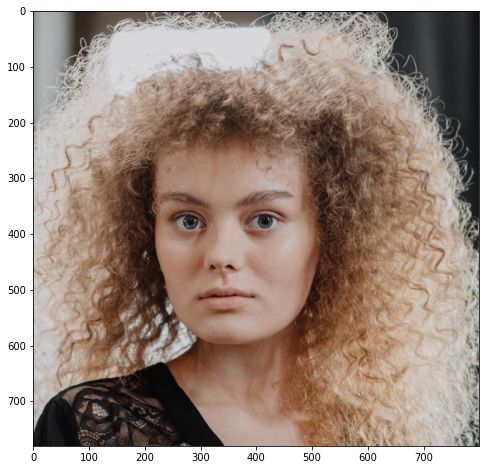

In [145]:
im = cv2.imread("../resource/lib/publicdata/images/girl-no-makeup.jpg")

imDlibE = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlibE)

## Face Rectangle for dynamic resizing
    - Face rectangle height is taken into account for the detected face
    - The condition is too pass a certain degree of confidence
    - The earrings aspect ratio are changed based on the distance of the camera from the face
    - And on which face is the most prominent.

In [146]:
detector = dlib.get_frontal_face_detector()
faces = detector(imDlibE)
height = []
if (len(faces) > 0):
    dets, scores, idx = detector.run(imDlibE)
    for i, d in enumerate(dets):
        print("Detection {}, score: {}".format(
            d, scores[i]))
        if(scores[i] > 0.75):
            height.append(d.height())

Detection [(198, 267) (508, 577)], score: 1.9370355759926263


In [147]:
height

[311]

In [148]:
!ls Data 

1.png  2.png  Glass1.png  SunGlass.png	TestSubject1.png  TestSubject2.png


## Path to the image
   - Reading the Earring images

In [149]:
filePathR = os.path.join(os.getcwd(),"Data", "1.png")
filePathL = os.path.join(os.getcwd(),"Data", "2.png")
print(filePathR,'\n',filePathL)

/mnt/data2/students/ccc_v1_w_NWE2_114024/asn197481_12/asn197482_1/work/Data/1.png 
 /mnt/data2/students/ccc_v1_w_NWE2_114024/asn197481_12/asn197482_1/work/Data/2.png


In [150]:
ImageR = cv2.imread(filePathR, -1)
ImageL = cv2.imread(filePathL, -1)

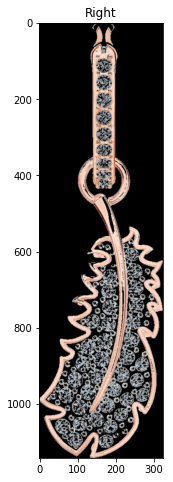

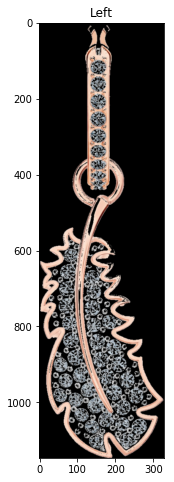

In [151]:
plt.subplot(121);plt.imshow(cv2.cvtColor(ImageR, cv2.COLOR_BGR2RGB));plt.title("Right");plt.show()
plt.subplot(121);plt.imshow(cv2.cvtColor(ImageL, cv2.COLOR_BGR2RGB));plt.title("Left");plt.show()

In [152]:
print(points[3], points[15])

(233, 480) (513, 408)


** Resizing the earings based on the height of the detected face with the most confidence.**
    - Both the earings will be shaped according to this ratio
    - The aspect ratio is based on heuristics 
    - The dimensions are based on the height of the face rectangle
    - dw : width 
    - dh : height

In [168]:
dw = int(dh * 0.2)
dh = int(height[0]*0.4)
print(dw,dh)

24 124


In [169]:
ResizeImageR = cv2.resize(ImageR, (dw,dh))
ResizeImageL = cv2.resize(ImageL, (dw,dh))

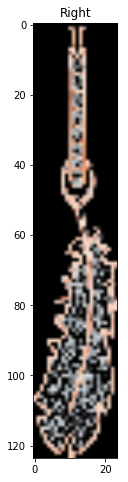

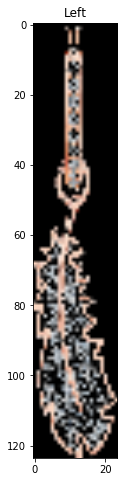

In [170]:
plt.subplot(121);plt.imshow(cv2.cvtColor(ResizeImageR, cv2.COLOR_BGR2RGB));plt.title("Right");plt.show()
plt.subplot(121);plt.imshow(cv2.cvtColor(ResizeImageL, cv2.COLOR_BGR2RGB));plt.title("Left");plt.show()

## Preparing Earrings for superimposing on the image

- To obtain this we are going to split the channels in to RGB and Alpha
- Detecting the face
- Using landmarks to position the earrings with respect to the face
- This process can be thought as follows :
    - Alpha channel shows the part of the image that is transparent
    - When we take the bitwise_not we will get the pixel area which will be occupied by the earrings 
    - This will be multiplied with the Region of Interest(ROI) of the image we want to add earring too.
    - The resultant image will contain the area occupied by the earring region
    - Then using bitwise_or we will add the ROI of the images to obtain the final image

In [171]:
bL,gL,rL,aL = cv2.split(ResizeImageL)
bR,gR,rR,aR = cv2.split(ResizeImageR)

In [172]:
ImageL3 = cv2.merge((bL,gL,rL))
ImageR3 = cv2.merge((bR,gR,rR))

In [173]:
ImageL3.shape

(124, 24, 3)

In [174]:
ImageLA = cv2.merge((aL,aL,aL))
ImageRA = cv2.merge((aR,aR,aR))

## Image Channels

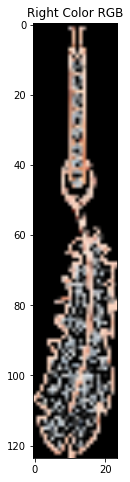

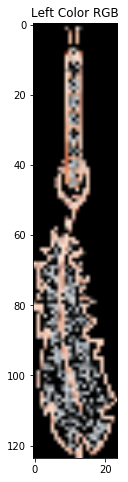

In [175]:
plt.subplot(121);plt.imshow(cv2.cvtColor(ImageR3, cv2.COLOR_BGR2RGB));plt.title("Right Color RGB");plt.show()
plt.subplot(121);plt.imshow(cv2.cvtColor(ImageL3, cv2.COLOR_BGR2RGB));plt.title("Left Color RGB");plt.show()

In [176]:
print(ImageR3.shape, ImageL3.shape)

(124, 24, 3) (124, 24, 3)


## Alpha Channels

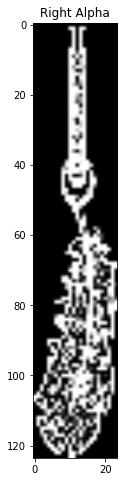

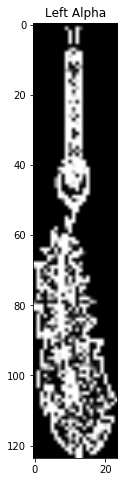

In [177]:
plt.subplot(121);plt.imshow(ImageRA);plt.title("Right Alpha");plt.show()
plt.subplot(121);plt.imshow(ImageLA);plt.title("Left Alpha");plt.show()

In [178]:
print(ImageRA.shape, ImageLA.shape)

(124, 24, 3) (124, 24, 3)


## Point of interest
    - This is the point where the image will be attached with

In [179]:
left = points[2]
right = points[14]
print(left, right)

(224, 446) (508, 447)


## Left Earring 

    - Computing points for left ear region of interest

In [201]:
y1 = points[2][1]
y2 = y1 + dh
x1 = points[2][0] - int((dw / 2))
x2 = points[2][0] + int((dw / 2))

In [202]:
print(y1,y2,x1,x2)

446 570 212 236


In [203]:
print(y2-y1, x2-x1)

124 24


Selecting ROI

In [204]:
EaringGirl = imDlib.copy()

In [205]:
print(y1,y2,x1,x2)

446 570 212 236


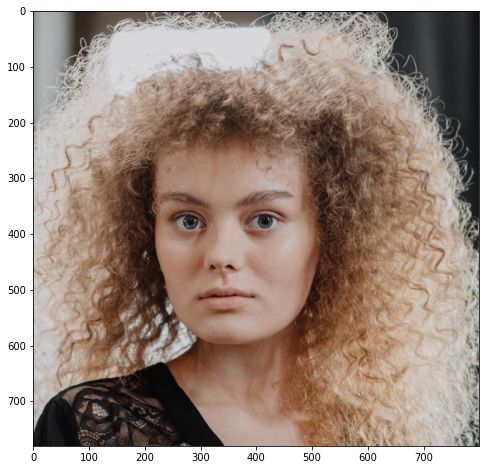

In [206]:
plt.imshow(EaringGirl)

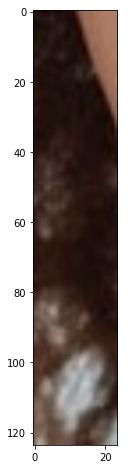

In [207]:
plt.imshow(EaringGirl[y1:y2, x1:x2])

In [208]:
print(EaringGirl[y1:y2, x1:x2].shape)

(124, 24, 3)


In [209]:
print(ImageLA.shape, EaringGirl[y1:y2, x1:x2].shape)

(124, 24, 3) (124, 24, 3)


## Alpha Channel Mergining

In [210]:
EaringGirlROIL = EaringGirl[y1:y2, x1:x2]
print(EaringGirlROIL.shape,ImageLA.shape)
EaringGirlROILAlpha = cv2.bitwise_and(EaringGirlROIL,cv2.bitwise_not(ImageLA))

(124, 24, 3) (124, 24, 3)


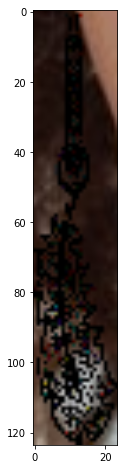

In [211]:
plt.imshow(EaringGirlROILAlpha)

## Earring for Left Ear

In [212]:
print(EaringGirlROILAlpha.shape,ImageL3.shape)

(124, 24, 3) (124, 24, 3)


## Adding the earring on to the original image
    - Using the bitwise_or operation

In [213]:
EaringGirlROILFinalL = cv2.bitwise_or(EaringGirlROILAlpha , ImageL3)

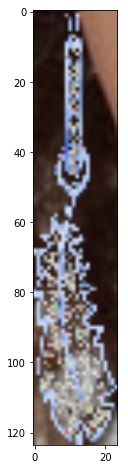

In [214]:
plt.imshow(EaringGirlROILFinalL)

## Merging the two ROI with Original Image

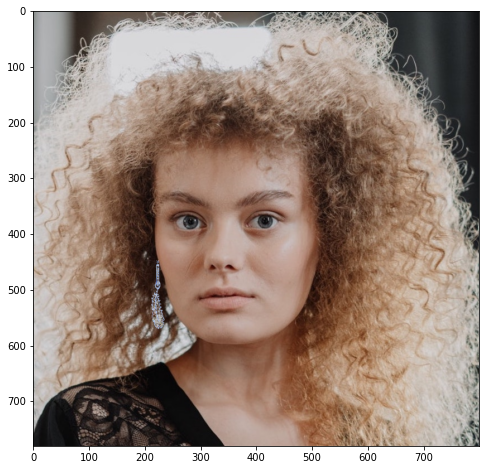

In [197]:
EaringGirl[y1:y2, x1:x2] = EaringGirlROILFinalL
plt.imshow(EaringGirl)

## Right Earring

In [198]:
EaringGirlR = imDlib.copy()

In [199]:
points[14]

(508, 447)

In [200]:
y1 = points[14][1]
y2 = y1 + dh
x1 = points[14][0] - int((dw / 2))
x2 = points[14][0] + int((dw / 2))

In [218]:
print(y1,y2,x1,x2)

447 571 496 520


In [219]:
print(ImageR3.shape, EaringGirlR[y1:y2, x1:x2].shape)

(124, 24, 3) (124, 24, 3)


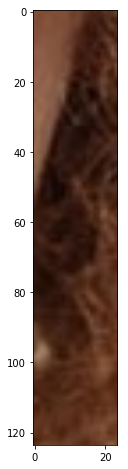

In [220]:
plt.imshow(EaringGirlR[y1:y2, x1:x2])

In [221]:
print(EaringGirlR[y1:y2, x1:x2].shape)
EaringGirlROIRAlpha = cv2.bitwise_and(EaringGirlR[y1:y2, x1:x2],cv2.bitwise_not(ImageRA))

(124, 24, 3)


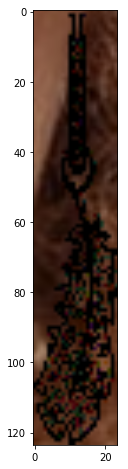

In [222]:
plt.imshow(EaringGirlROIRAlpha)

In [223]:
EaringGirlROIRFinalR = cv2.bitwise_or(EaringGirlROIRAlpha , ImageR3)

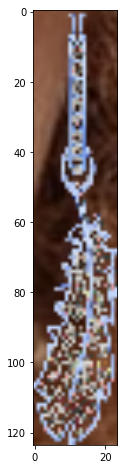

In [224]:
plt.imshow(EaringGirlROIRFinalR)

# The final Image with Earrings

In [225]:
EaringGirlROIRFinalR.shape

(124, 24, 3)

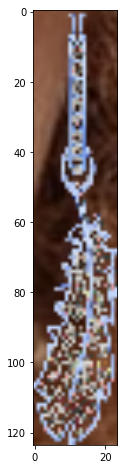

In [227]:
plt.imshow(EaringGirlROIRFinalR)

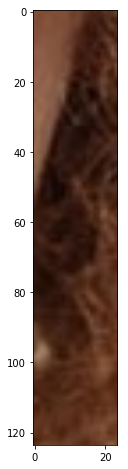

In [231]:
plt.imshow(EaringGirl[y1:y2, x1:x2])

## Merging the 2 image to get the final output

In [232]:
print(y1,y2,x1,x2)

447 571 496 520


In [233]:
EaringGirl[y1:y2, x1:x2] = EaringGirlROIRFinalR

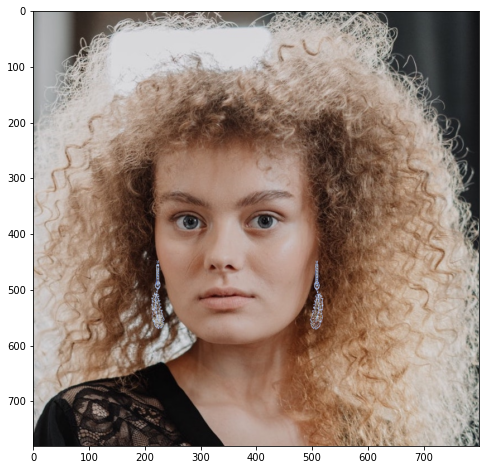

In [234]:
plt.imshow(EaringGirl)